In [2943]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from datetime import timedelta
from datetime import datetime
import matplotlib.dates as mdates

import seaborn
seaborn.set(font_scale=1.5,style='ticks')
clrs = seaborn.color_palette()


In [2944]:
ROOT_dir = 'C:/Users/takam/Desktop/pyhomecage/mice/'

In [2945]:
mouse_fs = [os.path.join(ROOT_dir,i) for i in os.listdir(ROOT_dir) if 'mice' not in i]

In [3030]:
mix = 2
df = pd.read_csv(mouse_fs[mix])

In [3031]:
now = datetime.now()

In [3032]:
df['entry_time']= pd.to_datetime(df['entry_time'])


In [3033]:
n_days_back = 1

weights = df[df['entry_time']>(now-timedelta(days=n_days_back))]['weight'].values
time = df[df['entry_time']>(now-timedelta(days=n_days_back))]['entry_time'].values

In [3034]:
variables = df[df['entry_time']>(now-timedelta(days=n_days_back))]['Variables'].values
sum([int(eval(i)['n_rewards']) for i in variables if int(eval(i)['n_rewards'])<300])

0

In [3035]:
[int(eval(i)['n_rewards']) for i in variables if int(eval(i)['n_rewards'])<200]

[0, 0]

In [3036]:
(now-timedelta(days=n_days_back))

datetime.datetime(2021, 4, 18, 14, 22, 18, 830278)

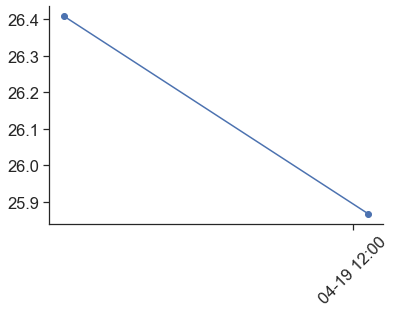

In [3037]:
plt.plot(time,weights,marker='o')
plt.xticks(rotation=45)
myFmt = mdates.DateFormatter('%m-%d %H:%M')
plt.gca().xaxis.set_major_formatter(myFmt)
hlc = mdates.HourLocator(byhour=range(0,24,4))
hlc.MAXTICKS = 6000
plt.gca().xaxis.set_major_locator(hlc)   #to get a tick every 15 minutes


seaborn.despine()

In [2955]:
import pykalman

In [2956]:
t_ = (time[-1] -time[0])
t_ = t_.astype('timedelta64[h]')
n_hours = 1+ t_.item().total_seconds()/3600.

In [2957]:
start_time

datetime.datetime(2021, 4, 16, 15, 13, 38)

In [2958]:
tm

datetime.datetime(2021, 4, 17, 4, 35, 2)

In [2959]:
timestep = 30 #timestep size in minutes
#start_time = time[0]
start_time = datetime.utcfromtimestamp(time[0].tolist()/1e9)
n_timesteps = int((1+n_hours)*(60/timestep))
weights_kf = np.zeros(n_timesteps) + np.nan
kf_times = [start_time]
for t_ in range(1,n_timesteps):
    tdt = start_time + timedelta(minutes=timestep*t_)
    weights_at_t = []
    for w,tm in zip(weights,time):
        tm = datetime.utcfromtimestamp(tm.tolist()/1e9)
        if abs((tm-tdt).total_seconds())<(timestep*60):
            #print(tm,tdt,(tm-tdt).total_seconds())
            weights_at_t.append(w)
            
            
    if weights_at_t:
        weights_kf[t_] = np.mean(weights_at_t)
    kf_times.append(tdt)
        

In [2960]:
weights_kf_ma = np.ma.masked_invalid(weights_kf)

In [2961]:
kf = pykalman.KalmanFilter(initial_state_mean=weights[0],observation_covariance=[2])

In [2962]:
em_vars = ['transition_covariance',
           'initial_state_mean', 
           'observation_covariance',
           'initial_state_covariance']
kf.em(weights_kf_ma,n_iter=5,em_vars=em_vars)
a,b = kf.smooth(weights_kf_ma,)
mu = a.flatten()
std = np.sqrt(b.flatten())

In [2963]:
kf.transition_covariance

array([[0.31988642]])

In [2964]:
kf.observation_covariance

array([[0.18200298]])

In [2965]:
weights_kf_ma.mask.sum()

2

In [2966]:
kf.transition_matrices

array([[1.]])

In [2967]:
len(kf_times)

4

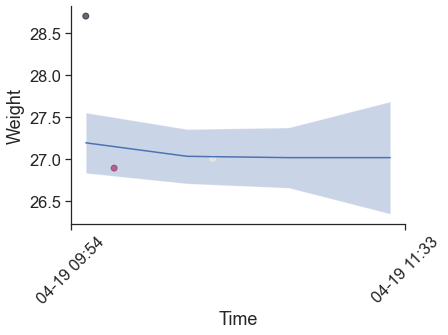

In [2968]:
x_ = time
plt.plot(kf_times,a)
plt.fill_between(kf_times,mu-std,mu+std,alpha=.3)
plt.scatter(x_,weights,alpha=.6,c=clrs[0])

plt.xticks(rotation=45)
myFmt = mdates.DateFormatter('%m-%d %H:%M')
plt.gca().xaxis.set_major_formatter(myFmt)
hlc = mdates.HourLocator(byhour=range(0,24,6))
hlc.MAXTICKS = 6000
plt.gca().xaxis.set_major_locator(hlc)   #to get a tick every 15 minutes
plt.ylabel("Weight")
plt.xlabel("Time")
seaborn.despine()

In [2969]:
print(mu[-1],weights[-1])

27.016553419596228 27.007590000000004


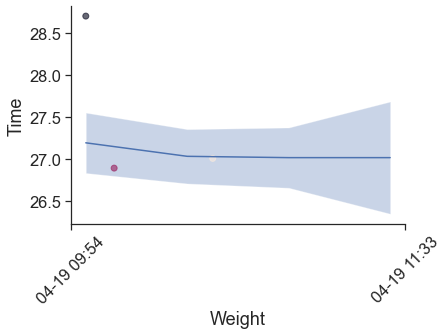

In [2970]:
x_ = time
plt.plot(kf_times,a)
plt.fill_between(kf_times,mu-std,mu+std,alpha=.3)
plt.scatter(x_,weights,alpha=.6,c=clrs[0])

plt.xticks(rotation=45)
myFmt = mdates.DateFormatter('%m-%d %H:%M')
plt.gca().xaxis.set_major_formatter(myFmt)
hlc = mdates.HourLocator(byhour=range(0,24,4))
hlc.MAXTICKS = 6000
plt.gca().xaxis.set_major_locator(hlc)   #to get a tick every 15 minutes
plt.xlabel("Weight")
plt.ylabel("Time")
seaborn.despine()

In [2971]:
b.flat

In [2850]:
import re

In [2851]:
path = 'C:/Users/takam/Desktop/pyhomecage/setups/loggers/setup_alpha2_-2021-04-12-144244.txt'
with open(path,'r') as f:
    dat = f.readlines()

In [2852]:
dat2 = [float(re.findall('Wbase:(.*)_',i)[0]) for i in dat if re.findall('Wbase:(.*)_',i)]

In [2853]:
len(dat2)

489904

In [2854]:
np.var(dat2[:2000])

2.430686693285962

In [2855]:
np.var(dat2[1000:2000])

4.522011488986914

In [2856]:
len(dat2)/1000.

489.904

In [2857]:
varincs = []
for i in range(100,400):
    varincs.append(np.var(dat2[i*1000:(1+i)*1000]))

C:\Users\takam\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

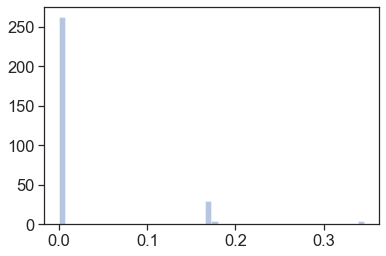

In [2451]:
seaborn.distplot(varincs,kde=0)